<a href="https://colab.research.google.com/github/sowmyamahendarkar/Excel-/blob/main/GDP_python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn plotly

       Country    2020      2021      2022      2023      2024      2025
0  Afghanistan   20136   14278.0   14501.0   17248.0       NaN       NaN
1      Albania   15271   18086.0   19185.0   23388.0   27259.0   28372.0
2      Algeria  164774  185850.0  225709.0  247789.0  264913.0  268885.0
3      Andorra    2885    3325.0    3376.0    3786.0    4038.0    4035.0
4       Angola   66521   84375.0  142442.0  109764.0  115946.0  113343.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  196 non-null    object 
 1   2020     196 non-null    int64  
 2   2021     194 non-null    float64
 3   2022     194 non-null    float64
 4   2023     194 non-null    float64
 5   2024     192 non-null    float64
 6   2025     189 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 10.8+ KB
None


/tmp/ipython-input-1879898173.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




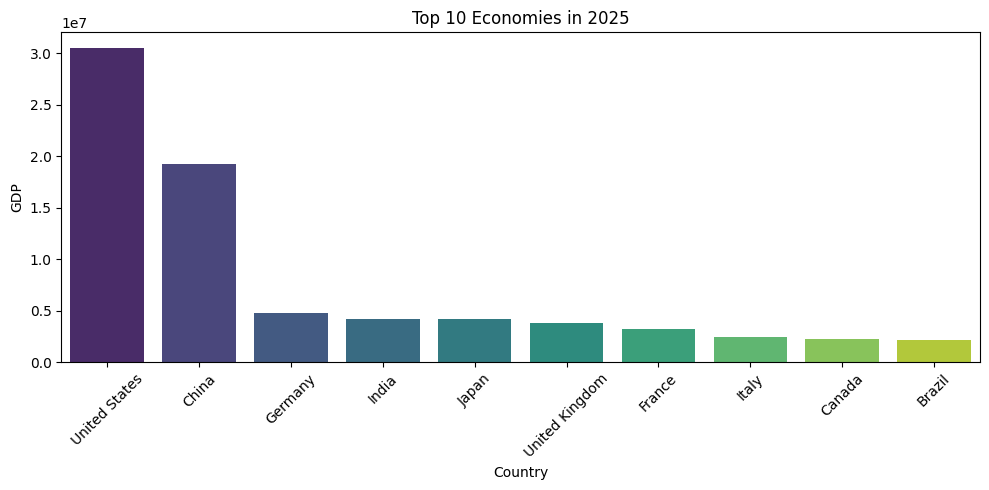

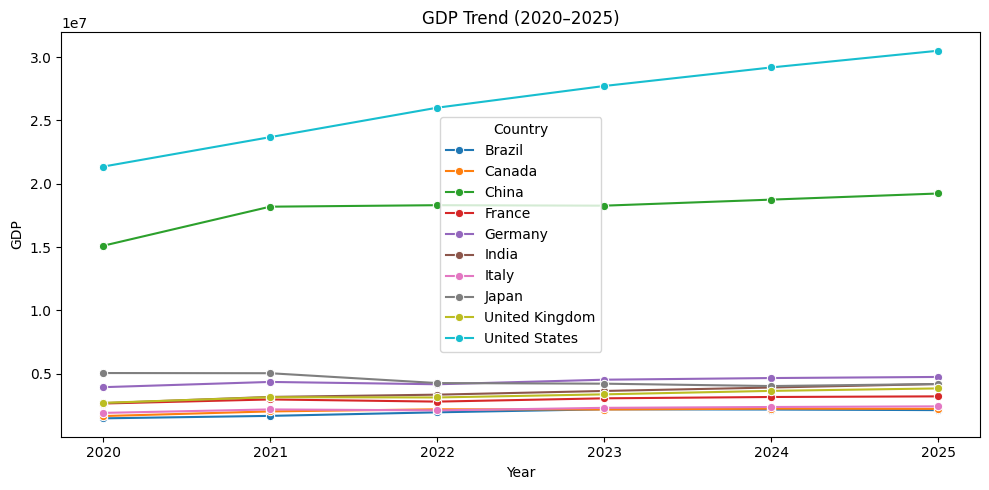

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv("/content/2020-2025 (1).csv")

# Basic data check
print(df.head())
print(df.info())

# Melt the DataFrame to have 'Year' as a column
df_melted = df.melt(id_vars=['Country'], var_name='Year', value_name='GDP')

# Convert Year to string for plotting
df_melted['Year'] = df_melted['Year'].astype(str)

# 1. Top 10 economies in 2025
top_2025 = df_melted[df_melted['Year'] == '2025'].sort_values(by='GDP', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_2025, x='Country', y='GDP', palette='viridis')
plt.title('Top 10 Economies in 2025')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. GDP trend over time for top 5 countries
top_countries = top_2025['Country'].tolist()
trend_df = df_melted[df_melted['Country'].isin(top_countries)]

plt.figure(figsize=(10,5))
sns.lineplot(data=trend_df, x='Year', y='GDP', hue='Country', marker='o')
plt.title('GDP Trend (2020–2025)')
plt.tight_layout()
plt.show()

# 3. Interactive GDP map for 2025
map_df = df_melted[df_melted['Year'] == '2025']
fig = px.choropleth(map_df, locations='Country', locationmode='country names',
                    color='GDP', hover_name='Country',
                    color_continuous_scale='Plasma',
                    title='Global GDP Distribution in 2025')
fig.show()